# **Aviation Accidents Exploratory Data Analysis**

### In this notebook, we are performing exploratory data analysis on Aviations Accidents Dataset.

1. [Import Standard Libraries](#Import)  
2. [Load the dataset into a dataframe](#Data)  
3. [Data Cleanup](#Cleanup)  
4. [Exploratory Data Analysis](#EDA)  
[Plot 1: Distribution of Accidents in different Countries (Count of Accidents > 200)](#Plot1)  
[Plot 2: Distribution of Injuries or Fatalities in the World](#Plot2)  
[Plot 3: Distribution of Accidents in the US](#Plot3)  
[Plot 4: Top 10 companies which are involved in accidents](#Plot4)  
[Plot 5: Analysis of Notorious Models of Top 4 Companies involved in accidents](#Plot5)  
[Plot 6: Time Series of Injuries/Fatalities wrt Aircraft.Damage](#Plot6)  
[Plot 7: What was the Phase of Flight and Weather Conditions when accident took place?](#Plot7)  
[Plot 8: What was the Engine Type of Fatal or Non-Fatal accidents?](#Plot8)  
5. [Observations](#ob)  
6. [References](#ref)  

### 1. **<a id="Import">Import Standard Libraries</a>**

In [2]:
#Import Standard Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import plotly.express as px
#from shapely.geometry import Point
#import geopandas as gpd
import plotly.graph_objects as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode()

from warnings import filterwarnings
filterwarnings("ignore")

### 2. **<a id="Data">Load the dataset into a dataframe</a>**

In [3]:
#Read dataset
aviation1 = pd.read_csv("AviationData.csv", encoding='ISO-8859-1')

In [4]:
#View the dataset
aviation1.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20200102X82407           Accident      WPR20CA055  2019-12-31   
1  20191231X83852           Accident      CEN20FA049  2019-12-31   
2  20200102X54844           Accident      ANC20CA011  2019-12-31   
3  20191230X91852           Accident      CEN20CA048  2019-12-30   
4  20191228X62945                NaN      WPR20CA053  2019-12-28   

        Location        Country   Latitude   Longitude Airport.Code  \
0        Elk, CA  United States  39.128611 -123.715833          LLR   
1     OLATHE, KS  United States  38.846111  -94.736111          OJC   
2  Fairbanks, AK  United States  64.666945 -148.133334          NaN   
3   GRANBURY, TX  United States  32.365556  -97.645000          NaN   
4   Missoula, MT  United States        NaN         NaN          MSO   

               Airport.Name  ... Purpose.of.Flight Air.Carrier  \
0              Little River  ...          Personal         NaN   
1  Johnson County Executive  ...          Personal         NaN   
2                       NaN  ...          Personal         NaN   
3                       NaN  ...          Personal         NaN   
4                       NaN  ...               NaN         NaN   

  Total.Fatal.Injuries Total.Serious.Injuries Total.Minor.Injuries  \
0                  NaN                    NaN                  NaN   
1                  2.0                    NaN                  NaN   
2                  NaN                    NaN                  NaN   
3                  NaN                    NaN                  NaN   
4                  NaN                    NaN                  NaN   

  Total.Uninjured Weather.Condition  Broad.Phase.of.Flight Report.Status  \
0             1.0               VMC                TAKEOFF       Factual   
1             NaN               VMC                TAKEOFF   Preliminary   
2             2.0               NaN                    NaN   Preliminary   
3             1.0               NaN                    NaN   Preliminary   
4             NaN               NaN                    NaN   Preliminary   

  Publication.Date  
0       13/01/2020  
1       08/01/2020  
2       02/01/2020  
3       31/12/2019  
4       03/01/2020  

[5 rows x 31 columns]

### 3. **<a id="Cleanup">Data Cleanup</a>**
#### **In this notebook, we'll be retaining only the relevant columns for our EDA**

In [5]:
#Drop irrelevant columns
columns = ['Event.Id', 'Investigation.Type','Accident.Number', 'Airport.Code', 'Airport.Name', 
           'Registration.Number', 'Air.Carrier', 'Schedule', 'FAR.Description']
aviation2 = aviation1.drop(columns, axis=1)
aviation2.head()

Event.Date       Location        Country   Latitude   Longitude  \
0  2019-12-31        Elk, CA  United States  39.128611 -123.715833   
1  2019-12-31     OLATHE, KS  United States  38.846111  -94.736111   
2  2019-12-31  Fairbanks, AK  United States  64.666945 -148.133334   
3  2019-12-30   GRANBURY, TX  United States  32.365556  -97.645000   
4  2019-12-28   Missoula, MT  United States        NaN         NaN   

  Injury.Severity Aircraft.Damage Aircraft.Category    Make  Model  ...  \
0       Non-Fatal     Substantial          Airplane  Cessna    175  ...   
1        Fatal(2)       Destroyed          Airplane  Mooney   M20S  ...   
2       Non-Fatal     Substantial          Airplane  Cessna    170  ...   
3       Non-Fatal     Substantial          Airplane    Vans  RV 10  ...   
4     Unavailable     Substantial               NaN  Cessna    170  ...   

     Engine.Type  Purpose.of.Flight Total.Fatal.Injuries  \
0  Reciprocating           Personal                  NaN   
1  Reciprocating           Personal                  2.0   
2            NaN           Personal                  NaN   
3            NaN           Personal                  NaN   
4            NaN                NaN                  NaN   

  Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
0                    NaN                   NaN              1.0   
1                    NaN                   NaN              NaN   
2                    NaN                   NaN              2.0   
3                    NaN                   NaN              1.0   
4                    NaN                   NaN              NaN   

   Weather.Condition  Broad.Phase.of.Flight Report.Status Publication.Date  
0                VMC                TAKEOFF       Factual       13/01/2020  
1                VMC                TAKEOFF   Preliminary       08/01/2020  
2                NaN                    NaN   Preliminary       02/01/2020  
3                NaN                    NaN   Preliminary       31/12/2019  
4                NaN                    NaN   Preliminary       03/01/2020  

[5 rows x 22 columns]

#### *Column Location contains information about City and State. We'll split this column into two columns. Further, column Injury.Severity contains information about the count of fatalities. We have separate column for that information. So, we'll keep only relevant information in InjurySeverityType field.*

In [6]:
aviation2['City'] = aviation2['Location'].str.split(',').str[0]
aviation2['State'] = aviation2['Location'].str.split(',').str[1]
aviation2['InjurySeverityType'] = aviation2['Injury.Severity'].str.split('(').str[0]

In [7]:
aviation3 = aviation2.drop(['Location','Injury.Severity'],axis=1)
numeric_columns = aviation3.select_dtypes(include=['float64']).columns
aviation3[numeric_columns] = aviation3[numeric_columns].fillna(0)
aviation = aviation3.fillna("UNKNOWN")
aviation.head()

Event.Date        Country   Latitude   Longitude Aircraft.Damage  \
0  2019-12-31  United States  39.128611 -123.715833     Substantial   
1  2019-12-31  United States  38.846111  -94.736111       Destroyed   
2  2019-12-31  United States  64.666945 -148.133334     Substantial   
3  2019-12-30  United States  32.365556  -97.645000     Substantial   
4  2019-12-28  United States   0.000000    0.000000     Substantial   

  Aircraft.Category    Make  Model Amateur.Built  Number.of.Engines  ...  \
0          Airplane  Cessna    175            No                1.0  ...   
1          Airplane  Mooney   M20S            No                1.0  ...   
2          Airplane  Cessna    170            No                1.0  ...   
3          Airplane    Vans  RV 10           Yes                0.0  ...   
4           UNKNOWN  Cessna    170            No                1.0  ...   

  Total.Serious.Injuries Total.Minor.Injuries  Total.Uninjured  \
0                    0.0                  0.0              1.0   
1                    0.0                  0.0              0.0   
2                    0.0                  0.0              2.0   
3                    0.0                  0.0              1.0   
4                    0.0                  0.0              0.0   

   Weather.Condition  Broad.Phase.of.Flight  Report.Status Publication.Date  \
0                VMC                TAKEOFF        Factual       13/01/2020   
1                VMC                TAKEOFF    Preliminary       08/01/2020   
2            UNKNOWN                UNKNOWN    Preliminary       02/01/2020   
3            UNKNOWN                UNKNOWN    Preliminary       31/12/2019   
4            UNKNOWN                UNKNOWN    Preliminary       03/01/2020   

        City State InjurySeverityType  
0        Elk    CA          Non-Fatal  
1     OLATHE    KS              Fatal  
2  Fairbanks    AK          Non-Fatal  
3   GRANBURY    TX          Non-Fatal  
4   Missoula    MT        Unavailable  

[5 rows x 23 columns]

### 4. **<a id="EDA">Exploratory Data Analysis</a>**

#### **Count the number of Accidents as per Countries**

In [8]:
# Count of Accidents as per Countries
accidents = aviation['Country'].groupby(aviation['Country']).count()
accidents

Country
Afghanistan       12
Algeria            5
American Samoa    10
Angola            10
Anguilla           1
                  ..
Vietnam            4
West Indies       11
Yemen              1
Zambia             2
Zimbabwe           4
Name: Country, Length: 180, dtype: int64

### **<a id="Plot1">Plot 1: Distribution of Accidents in different Countries (Count of Accidents > 200)</a>**

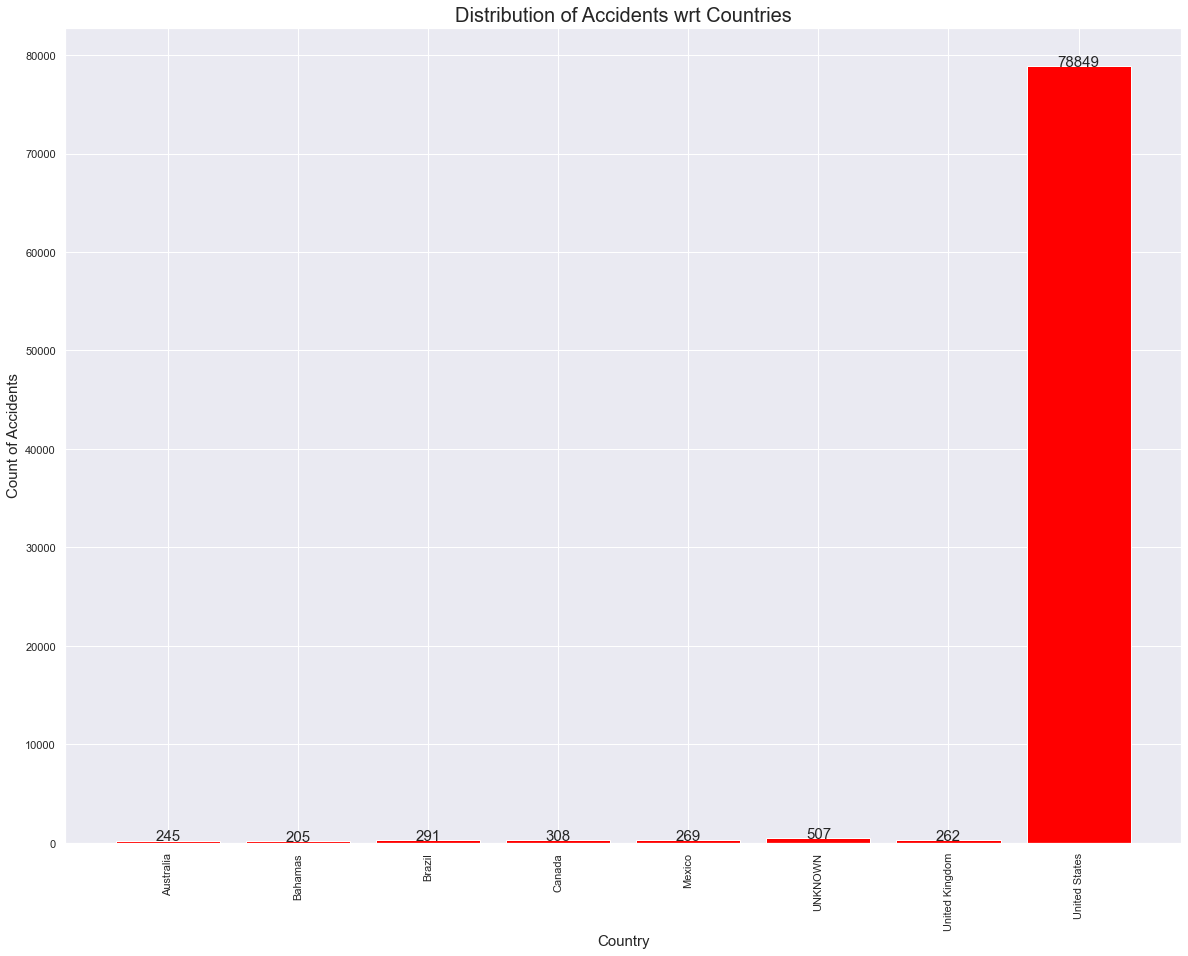

In [9]:
# Plot Country
fig = plt.figure(figsize=(20,15))
accidents_Count = accidents[aviation['Country'].groupby(aviation['Country']).count() > 200]
accidents_Count_df = pd.DataFrame({'Country':accidents_Count.index,'Count':accidents_Count.values})
plt.bar(accidents_Count_df['Country'], height = accidents_Count_df['Count'], color='red')
plt.xticks(rotation=90)
plt.xlabel("Country", size=15)
plt.ylabel("Count of Accidents", size=15)
y=accidents_Count_df['Count']
for i,v in enumerate(y):
    plt.text(x=i, y=v, s=str(v), horizontalalignment='center', size=15)
plt.title("Distribution of Accidents wrt Countries", size=20)
plt.show()

#### *As depicted from the plot, there are 7 countries namely Australia, Bahamas, Brazil, Canada, Mexico, United Kingdom and the United States which have count of accidents more than 200. Also, most of the accidents have occurred in the US only with staggering 78,849 count.*

### **<a id="Plot2">Plot 2: Distribution of Injuries or Fatalities in the World</a>**

In [10]:
aviation_State = pd.DataFrame(aviation['Total.Fatal.Injuries']+aviation['Total.Serious.Injuries']+aviation['Total.Minor.Injuries'])
aviation_State = aviation_State.rename(columns={0:"Injuries/Fatalities"})
aviation_merged = pd.concat([aviation,aviation_State], axis=1)
aviation_merged.head()

Event.Date        Country   Latitude   Longitude Aircraft.Damage  \
0  2019-12-31  United States  39.128611 -123.715833     Substantial   
1  2019-12-31  United States  38.846111  -94.736111       Destroyed   
2  2019-12-31  United States  64.666945 -148.133334     Substantial   
3  2019-12-30  United States  32.365556  -97.645000     Substantial   
4  2019-12-28  United States   0.000000    0.000000     Substantial   

  Aircraft.Category    Make  Model Amateur.Built  Number.of.Engines  ...  \
0          Airplane  Cessna    175            No                1.0  ...   
1          Airplane  Mooney   M20S            No                1.0  ...   
2          Airplane  Cessna    170            No                1.0  ...   
3          Airplane    Vans  RV 10           Yes                0.0  ...   
4           UNKNOWN  Cessna    170            No                1.0  ...   

  Total.Minor.Injuries Total.Uninjured  Weather.Condition  \
0                  0.0             1.0                VMC   
1                  0.0             0.0                VMC   
2                  0.0             2.0            UNKNOWN   
3                  0.0             1.0            UNKNOWN   
4                  0.0             0.0            UNKNOWN   

   Broad.Phase.of.Flight  Report.Status  Publication.Date       City State  \
0                TAKEOFF        Factual        13/01/2020        Elk    CA   
1                TAKEOFF    Preliminary        08/01/2020     OLATHE    KS   
2                UNKNOWN    Preliminary        02/01/2020  Fairbanks    AK   
3                UNKNOWN    Preliminary        31/12/2019   GRANBURY    TX   
4                UNKNOWN    Preliminary        03/01/2020   Missoula    MT   

  InjurySeverityType Injuries/Fatalities  
0          Non-Fatal                 0.0  
1              Fatal                 2.0  
2          Non-Fatal                 0.0  
3          Non-Fatal                 0.0  
4        Unavailable                 0.0  

[5 rows x 24 columns]

In [20]:
aviation_merged['text'] = aviation_merged['Country'] + '<br>Injuries/Fatalities ' + (aviation_merged['Injuries/Fatalities'].astype(str))
colors = ["darkblue","yellow","seagreen","purple","cyan","orange"]
limits = [(0,50),(50,100),(100,150),(150,175),(175,200),(350,400)]
#scale = 10
accidentState = []

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    Injuries_Count = aviation_merged[((aviation_merged['Injuries/Fatalities'] > lim[0]) & (aviation_merged['Injuries/Fatalities'] <lim[1]))]
    fig.add_trace(go.Scattergeo(
        locationmode = 'country names',
        lon = Injuries_Count['Longitude'],
        lat = Injuries_Count['Latitude'],
        opacity = 0.8,
        text = Injuries_Count['text'],
        marker = dict(
            size = Injuries_Count['Injuries/Fatalities'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))
    accidentState.append(Injuries_Count)

fig.update_layout(
        title_text = 'Distribution of Injuries/Fatalities in the World<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

#### *This plot depicts the distribution of Injuries or Fatalities due to aviation accidents in different countries of the world.*

### **<a id="Plot3">Plot 3: Distribution of Accidents in the US</a>**

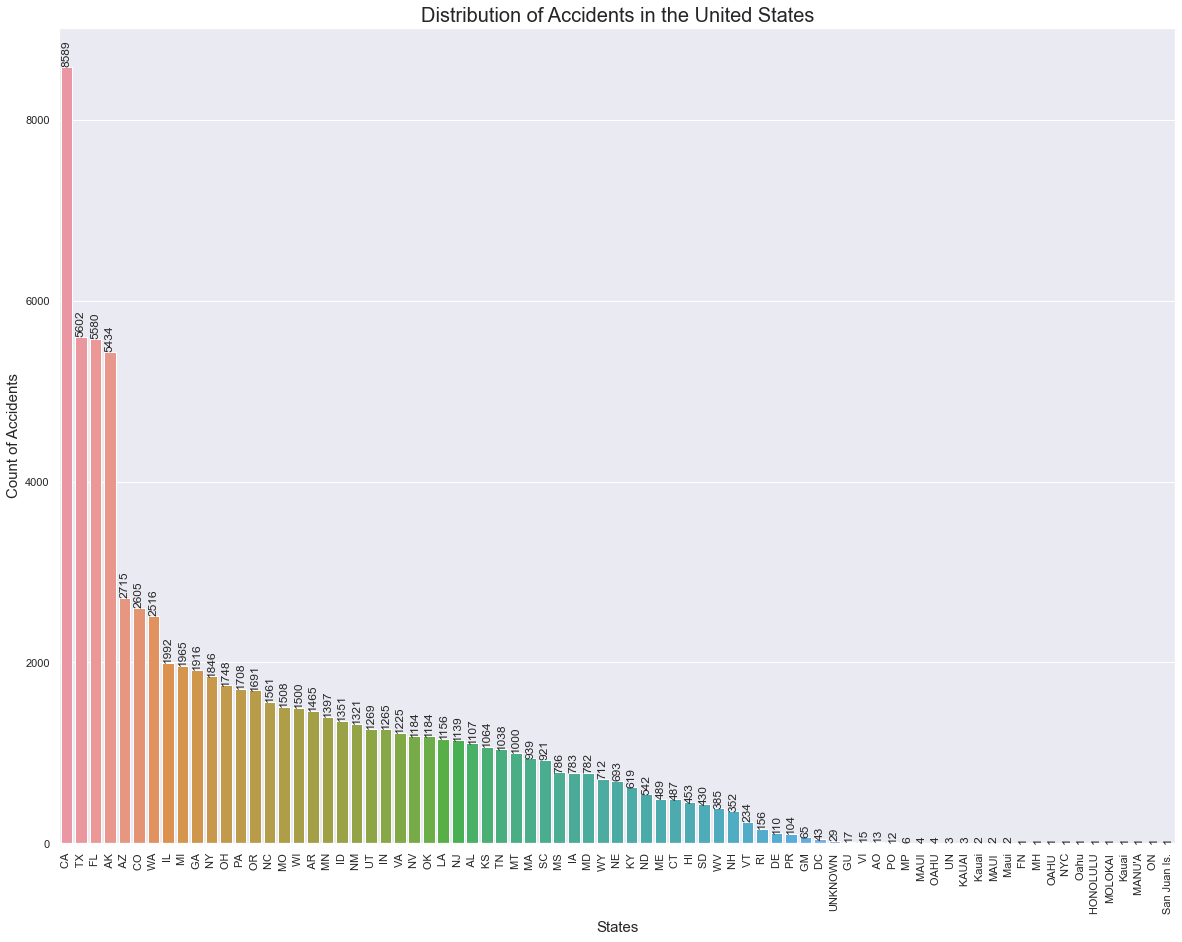

In [12]:
plt.figure(figsize=(20,15))
aviation_US = aviation[aviation['Country'] == 'United States']
sns.countplot(x='State', data=aviation_US, order = aviation_US['State'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("States", size=15)
plt.ylabel("Count of Accidents", size=15)
plt.title("Distribution of Accidents in the United States", size=20)
y=aviation_US['State'].value_counts()
for i, v in enumerate(y):
    plt.text(i,v,str(v), horizontalalignment='center', verticalalignment='bottom', fontsize=12, rotation=90)
plt.show()

#### *On diving deep into the distribution of accidents in the different states of US, we have discovered that 'CA' has the highest number of accidents, i.e., 8589 which is followed by 'TX' with 5602 accidents.*

### **<a id="Plot4">Plot 4: Top 10 Companies which are involved in accidents</a>**

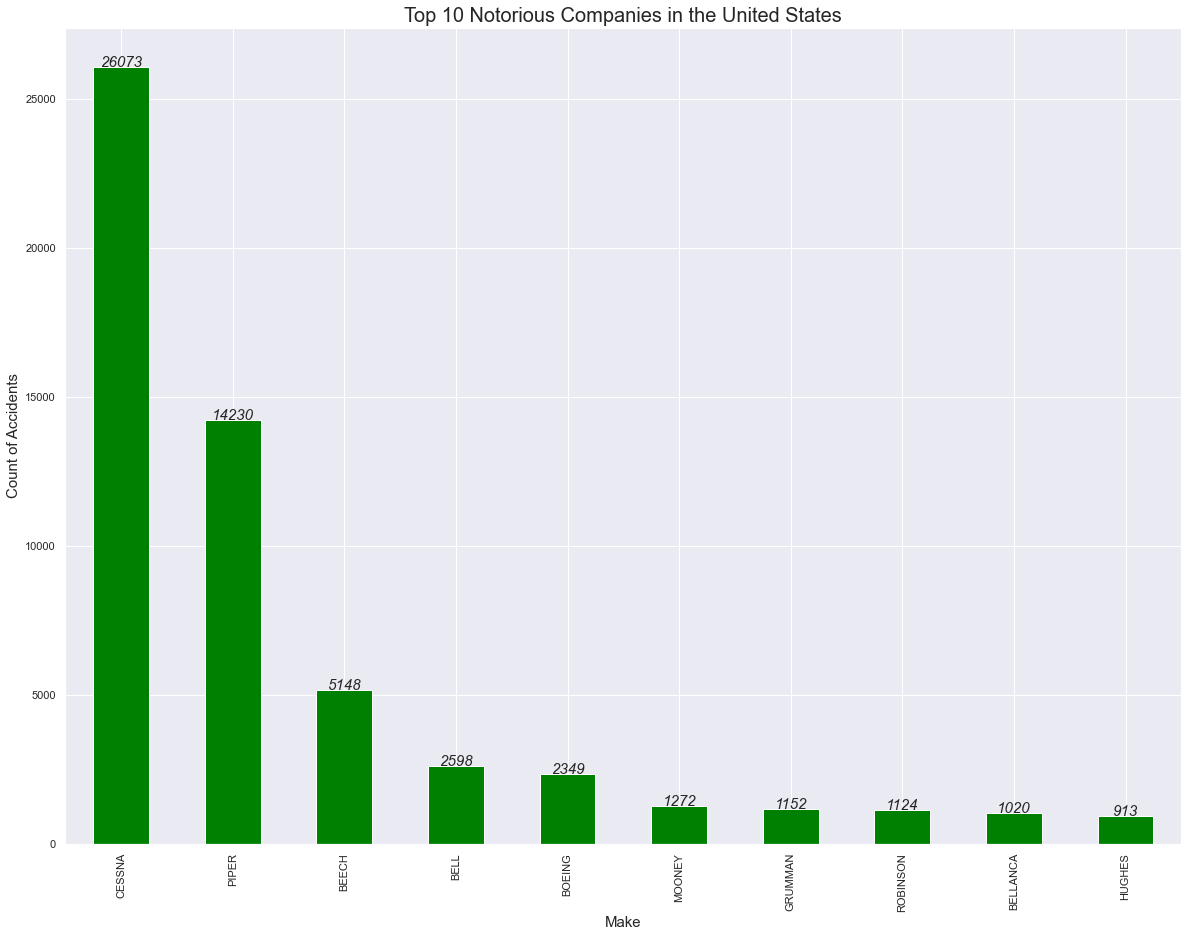

In [13]:
# Evaluate the Notorious Companies

plt.figure(figsize=(20,15))
aviation['Make'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Green')
plt.xticks(rotation=90)
plt.xlabel("Make", size=15)
plt.ylabel("Count of Accidents", size=15)
plt.title("Top 10 Notorious Companies in the United States", size=20)
y=aviation['Make'].str.upper().value_counts().sort_values(ascending=False)[:10]
for i, v in enumerate(y):
    plt.text(i, v, str(v), fontsize=15, style='oblique', horizontalalignment='center')
plt.show()


#### *In this plot, we are analysing the top 10 notorious companies which are involved in most of the accidents. 'Cessna' has 26,073 accidents in the bucket whereas 'Piper' and ' Beech' have 14,230 and 5148 accidents, respectively.*

### **<a id="Plot5">Plot 5: Analysis of Notorious Models of Top 4 Companies involved in accidents</a>**

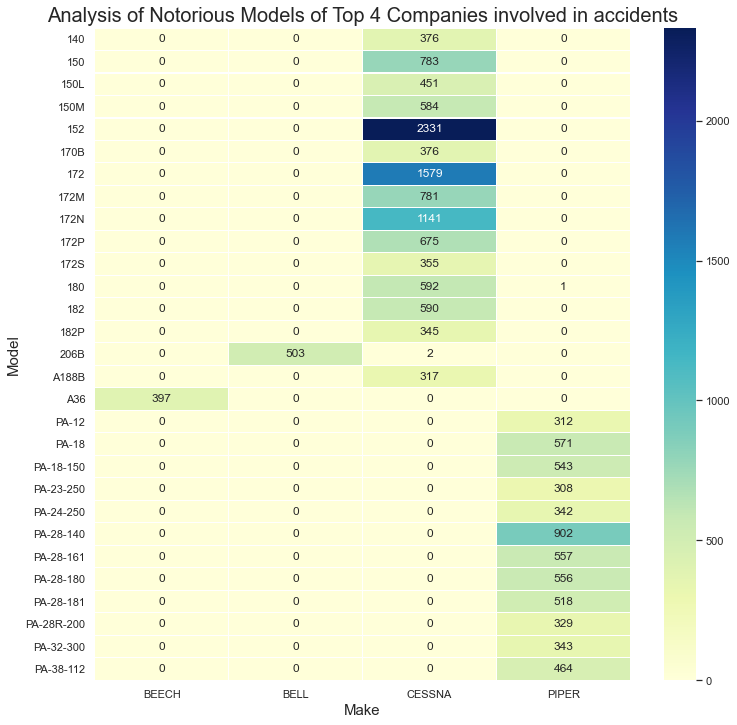

In [14]:
# Load the example flights dataset and convert to long-form
data1 = aviation_merged[aviation_merged['Make'].str.upper().isin(["CESSNA","PIPER","BEECH","BELL"])]
data2 = data1.replace('Cessna','CESSNA')
data3 = data2.replace('Bell','BELL')
data4 = data3.replace('Beech','BEECH')
data = data4.replace('Piper','PIPER')
table1 = pd.pivot_table(data, index=['Model'], columns=['Make'], values='Event.Date', aggfunc=np.count_nonzero, fill_value=0)
table2 = table1[(table1.values > 300)]

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(table2, annot=True, fmt="d", linewidths=.1, ax=ax, linecolor='white', cmap='YlGnBu')
plt.xlabel("Make", size=15)
plt.ylabel("Model", size=15)
plt.title("Analysis of Notorious Models of Top 4 Companies involved in accidents", size=20)
fig.show()

#### *As shown in the heatmap, CESSNA is the most notorious company. Its model '152' is involved in 2331 accidents. Models '172' and '172N' are involved in 1579 and 1141 accidents, respectively.*

### **<a id="Plot6">Plot 6: Time Series of Injuries/Fatalities wrt Aircraft.Damage</a>**

In [15]:
aviation_merged['Year'] = pd.DatetimeIndex(aviation_merged['Event.Date']).year
aviation_merged['Month'] = pd.DatetimeIndex(aviation_merged['Event.Date']).month_name()
aviation_merged.head()

Event.Date        Country   Latitude   Longitude Aircraft.Damage  \
0  2019-12-31  United States  39.128611 -123.715833     Substantial   
1  2019-12-31  United States  38.846111  -94.736111       Destroyed   
2  2019-12-31  United States  64.666945 -148.133334     Substantial   
3  2019-12-30  United States  32.365556  -97.645000     Substantial   
4  2019-12-28  United States   0.000000    0.000000     Substantial   

  Aircraft.Category    Make  Model Amateur.Built  Number.of.Engines  ...  \
0          Airplane  Cessna    175            No                1.0  ...   
1          Airplane  Mooney   M20S            No                1.0  ...   
2          Airplane  Cessna    170            No                1.0  ...   
3          Airplane    Vans  RV 10           Yes                0.0  ...   
4           UNKNOWN  Cessna    170            No                1.0  ...   

  Broad.Phase.of.Flight Report.Status  Publication.Date       City  State  \
0               TAKEOFF       Factual        13/01/2020        Elk     CA   
1               TAKEOFF   Preliminary        08/01/2020     OLATHE     KS   
2               UNKNOWN   Preliminary        02/01/2020  Fairbanks     AK   
3               UNKNOWN   Preliminary        31/12/2019   GRANBURY     TX   
4               UNKNOWN   Preliminary        03/01/2020   Missoula     MT   

   InjurySeverityType Injuries/Fatalities  \
0           Non-Fatal                 0.0   
1               Fatal                 2.0   
2           Non-Fatal                 0.0   
3           Non-Fatal                 0.0   
4         Unavailable                 0.0   

                                       text  Year     Month  
0  United States<br>Injuries/Fatalities 0.0  2019  December  
1  United States<br>Injuries/Fatalities 2.0  2019  December  
2  United States<br>Injuries/Fatalities 0.0  2019  December  
3  United States<br>Injuries/Fatalities 0.0  2019  December  
4  United States<br>Injuries/Fatalities 0.0  2019  December  

[5 rows x 27 columns]

In [16]:
fig = px.scatter(aviation_merged[(aviation_merged['Injuries/Fatalities'] > 10) & (aviation_merged['Country'] == 'United States')],
                 x="Year", y="Injuries/Fatalities", animation_frame="Year", animation_group="State",
                 size="Injuries/Fatalities", color="Aircraft.Damage", hover_name="State",
                 size_max=100, range_x=[1980,2020], range_y=[0,400],
                 category_orders ={'Year':[1962,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,
                                           1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,
                                           2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,
                                           2020]})
fig.show()

#### *This plot is the animated representation of Injuries or Fatalities with respect to Damages to the aircraft.*

### **<a id="Plot7">Plot 7: What was the Phase of Flight and Weather Conditions when accident took place?</a>**

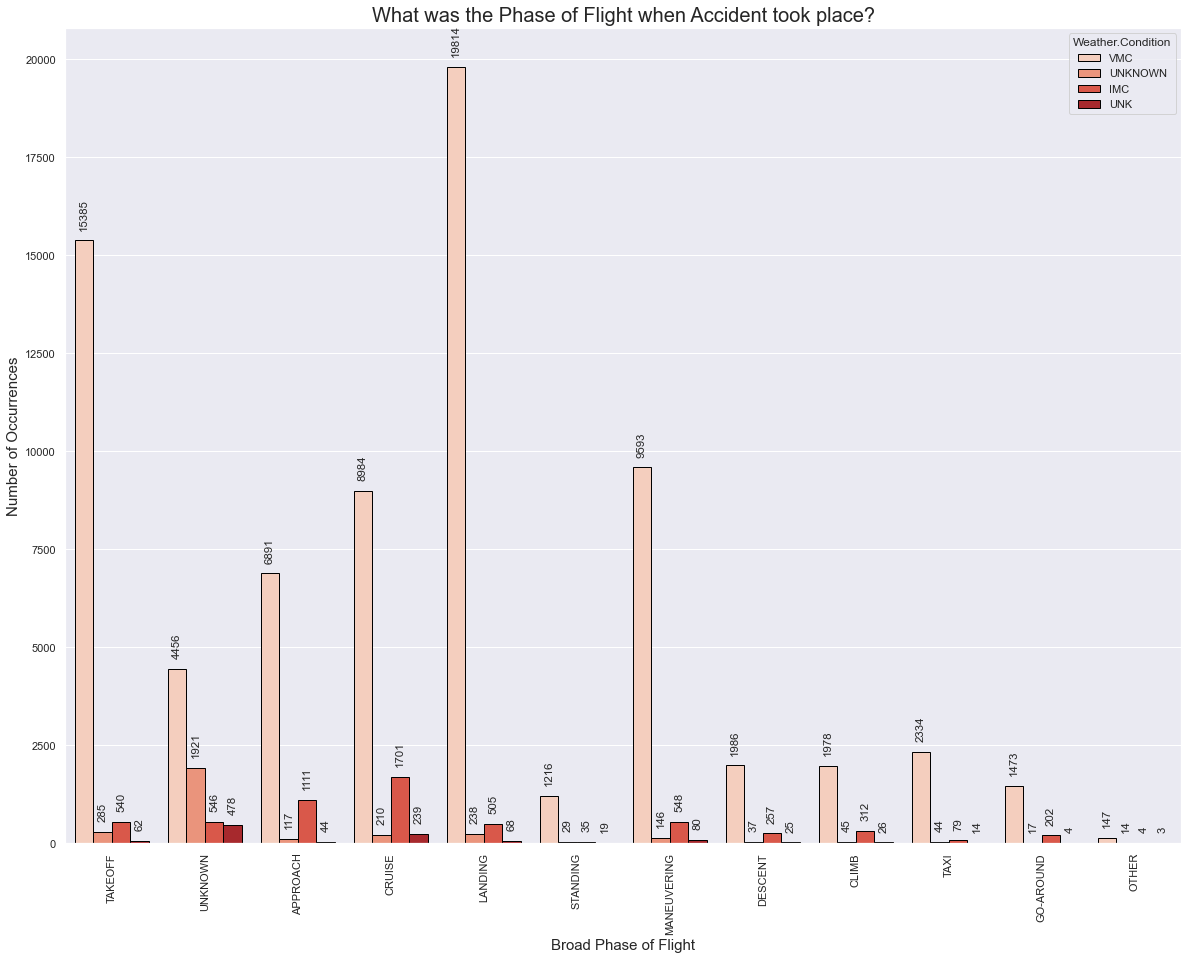

In [17]:
plt.figure(figsize=(20,15))
splot = sns.countplot(data=aviation_merged, x="Broad.Phase.of.Flight", hue='Weather.Condition', edgecolor=(0,0,0), linewidth=1, palette='Reds')
plt.xticks(rotation=90)
plt.xlabel("Broad Phase of Flight", size=15)
plt.ylabel("Number of Occurrences", size=15)
plt.title("What was the Phase of Flight when Accident took place?", size=20)
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., 
    p.get_height()), ha = 'center', va = 'bottom', xytext = (0, 10), textcoords = 'offset points', rotation=90, size=11.5)
plt.show()

#### *This plot illustrates that most of the accidents took place when aircraft was either Landing or Taking off. 19,814 accidents took place when the airplace was Landing and the weather conditions were clear for flight. About 15,385 accidents took place during take off with clear weather conditions.*

### **<a id="Plot8">Plot 8: What was the Engine Type of Fatal or Non-Fatal accidents?</a>**

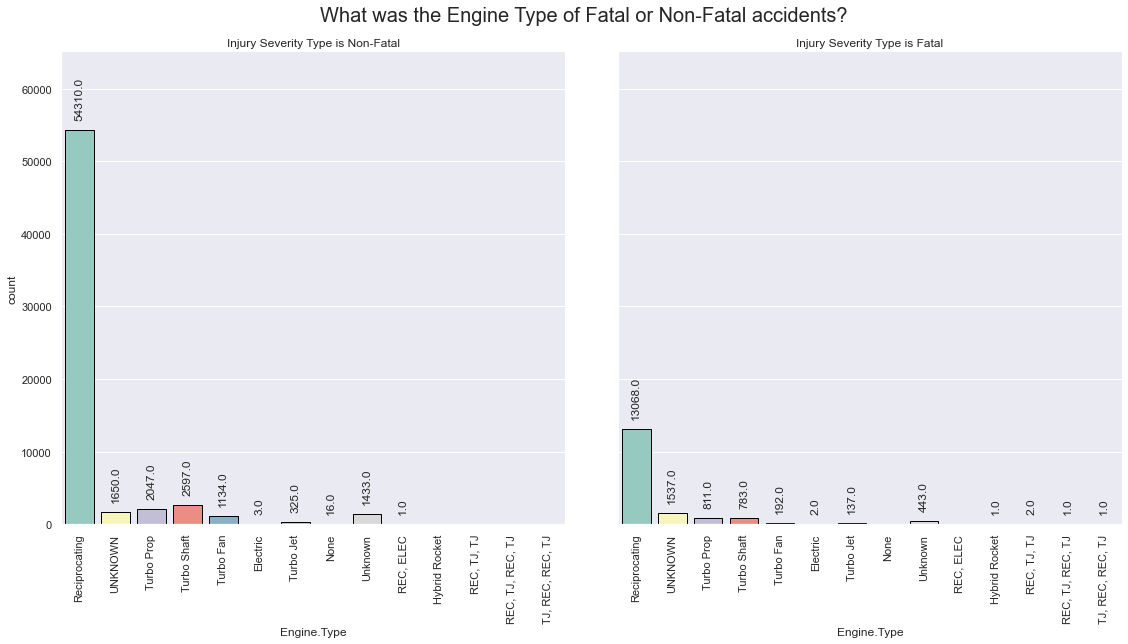

In [18]:
cplot = sns.catplot(x="Engine.Type", col="InjurySeverityType", kind="count", col_wrap=2,
            data=aviation_merged[aviation_merged['InjurySeverityType'].isin(['Fatal','Non-Fatal'])], height=4,
                 legend_out=True, size=8, palette="Set3", edgecolor=(0,0,0))
cplot.set_xticklabels(rotation=90)
cplot.fig.suptitle("What was the Engine Type of Fatal or Non-Fatal accidents?", size=20)
cplot.fig.subplots_adjust(top=.9)
cplot.set_titles("Injury Severity Type is {col_name}")
cplot.set(ylim=[0,65000])
for ax in cplot.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, 
        p.get_height()), ha = 'center', va = 'bottom', xytext = (0, 10), textcoords = 'offset points', rotation=90, size=12)
plt.show()

#### *Post analysis of above two plots, it can said that most of the Fatal or Non-Fatal accident occurred for Engine Type 'Reciprocating'. For Fatal, count is 13,068 whereas for Non-Fatal, count is around 54,310.*

## **<a id="ob">5. Observations</a>**

### From the above analysis, we have discovered that:  
- Most of the aviation accidents have taken place in the *United States*.  
- In the United States, California *CA* is leading in the count of aviation accidents.  
- *CESSNA* and *PIPER* are two topmost notorious companies which manufactured aircrafts that are involved in accidents as per this dataset.  
- Models *152*, *172*, and *172N* built by *CESSNA* are most involved in disastrous air accidents.  
- Most of the aviation incidents have taken place during *Takeoff* and *Landing*. Most of the times, weather conditions were favorable for flight. 
- Engine Type of both Fatal and Non-Fatal accidents was *Reciprocating* for most of the accidents. 

## **<a id="ref">6. References</a>**
- https://seaborn.pydata.org/introduction.html
- https://plotly.com/python/
- https://matplotlib.org/api/pyplot_api.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html